# Melbourne Real Estate Data Analysis 

To hep investors fully understand Melbourne real estate and give them a clue for better investments strategies, I downloaded melb dataset. It includes Melbourne property information from March 2016 to September 2017, with a total of 13,580 records and 21 features. 

The problems to be explained include,

1. The summary of property price distribution in Melbourne.
2. Factors affecting property price in Melbourne.
3. Reasons for price pattern.


### Dataset Overview

import libs and defaut setting

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import geopandas

In [49]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')


In [50]:
plt.rcParams['figure.figsize'] = [10, 10]

Get dataset info

In [3]:
#df_melb = pd.read_csv('melb_data.csv')

import pandas as pd
#import os

#os.getcwd()

df_melb = pd.read_csv("melb_data.csv")
df_melb.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [4]:
df_melb.info() # Browse dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
df_melb.isnull().sum().sort_values(ascending = False) # 4 variables have null value

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

In [6]:
df_melb.describe(include = 'object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,13580,13580,13580,13580,13580,13580,12211,13580
unique,314,13378,3,5,268,58,33,8
top,Reservoir,36 Aberfeldie St,h,S,Nelson,27/05/2017,Moreland,Southern Metropolitan
freq,359,3,9449,9022,1565,473,1163,4695


In [7]:
df_melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [8]:
df_melb.duplicated().sum() # 0 duplicate value.

0

The quality of the dataset are good. In total 13,580 records of 21 variables, there are no duplicate. But I was not going to consider building area and building year of property this time since almost half of them were null value. (6450 NA in Building Area, 5375 NA in Building Year)

### Overview Property Price

#### The number of property listed distribution

In [9]:
df_melb['Number'] = df_melb.index
df_melb['Year'] = df_melb['Date'].apply(lambda x:x[-4:]) # insert column year
df_melb['Month'] = df_melb['Date'].apply(lambda x: x[-7:-5]) # insert column month
df_melb['Month'] = pd.to_numeric(df_melb['Month'])
df_melb.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,0,2016,12
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,1,2016,2


In [10]:
df_count = df_melb['Type'].value_counts()
df_total = df_melb['Type'].count()
labels  =['House','Unit','Townhouse']
df_count

h    9449
u    3017
t    1114
Name: Type, dtype: int64

In [11]:
# To know the ratio under percentage format
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:d})'.format(p=pct,v=val)
    return my_autopct

In [12]:
sns.set_theme(style = 'darkgrid')

Text(0.5, 1.0, '13580 properties on sale in Melbourne')

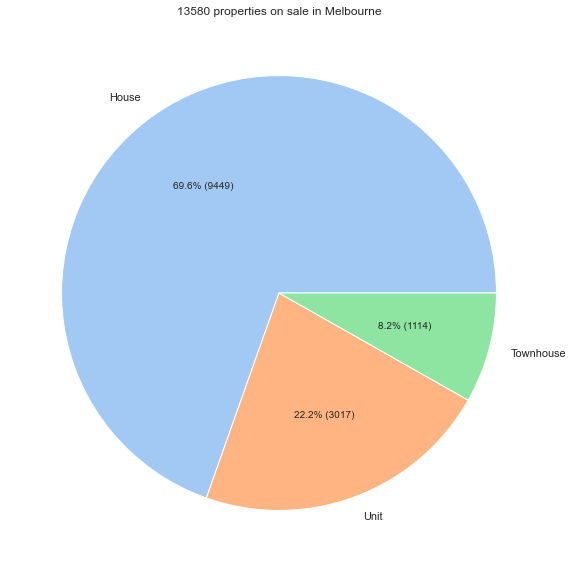

In [51]:
colors = sns.color_palette('pastel')[0:3]

#plt.pie(df_count, labels = labels, colors = colors, autopct= "%d%%")
plt.pie(df_count, labels = labels, colors = colors, autopct= make_autopct(df_count))
plt.title('%d properties on sale in Melbourne' %df_total)

In total, 13580 properties on sale in Melbourne. Among them, the number of house dominated the most. Next was the Unit. Townhouse got the least number.

#### Price distribution by location

In [14]:
melb = geopandas.read_file("suburb-10-vic.geojson")
melb.head(2)
melb.describe()

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry
count,2973,2973,2973,0,2973,2973,0,2973,0,31,2973,0,2973,2973
unique,2973,2973,23,0,2973,22,0,2957,0,28,1,0,1,2973
top,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,NaN,VIC2615,2012-04-27,NaN,GOLDEN POINT,NaN,3875,G,NaN,2,"POLYGON ((141.74552399 -35.07228701, 141.74552..."
freq,1,1,2002,NaN,1,2134,NaN,3,NaN,3,2973,NaN,2973,1


In [15]:
h_price = df_melb.groupby(['Suburb'])['Price'].median().reset_index()
h_price['Suburb'] = h_price['Suburb'].apply(lambda x: x.upper())
h_price = h_price.rename(columns={'Suburb':'vic_loca_2'})

melb_vis = melb.merge(h_price,on = 'vic_loca_2',how='left')
melb_vis.head(2)

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry,Price
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0...",NaN
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3...",NaN


(-38.1, -37.6)

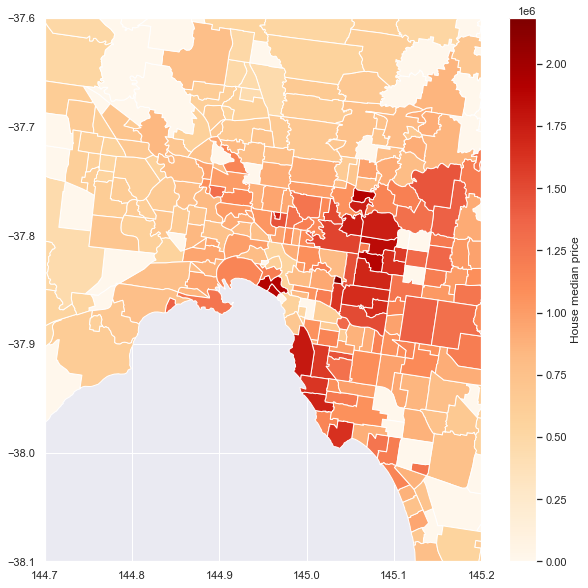

In [52]:
melb_vis['Price'].fillna(0,inplace = True)
fig,axs = plt.subplots(1,1)

melb_vis.plot(column='Price',ax = axs,legend = True,legend_kwds = {'label':'House median price','orientation':'vertical'},cmap='OrRd')
plt.xlim(144.70, 145.20)
plt.ylim(-38.10, -37.60)


In [17]:
h_count = df_melb.groupby(['Suburb'])['Number'].count().reset_index()
h_count['Suburb'] = h_count['Suburb'].apply(lambda x: x.upper())
h_count = h_count.rename(columns={'Suburb':'vic_loca_2'})

melb_vis_count = melb.merge(h_count,on = 'vic_loca_2',how='left')
melb_vis_count.head(2)

,id,lc_ply_pid,dt_create,dt_retire,loc_pid,vic_locali,vic_loca_1,vic_loca_2,vic_loca_3,vic_loca_4,vic_loca_5,vic_loca_6,vic_loca_7,geometry,Number
0,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.1,6670,2011-08-31,None,VIC2615,2012-04-27,None,UNDERBOOL,None,None,G,None,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0...",NaN
1,ckan_af33dd8c_0534_4e18_9245_fc64440f742e.2,6671,2011-08-31,None,VIC1986,2012-04-27,None,NURRAN,None,None,G,None,2,"POLYGON ((148.66877 -37.39571, 148.66767 -37.3...",NaN


(-38.1, -37.6)

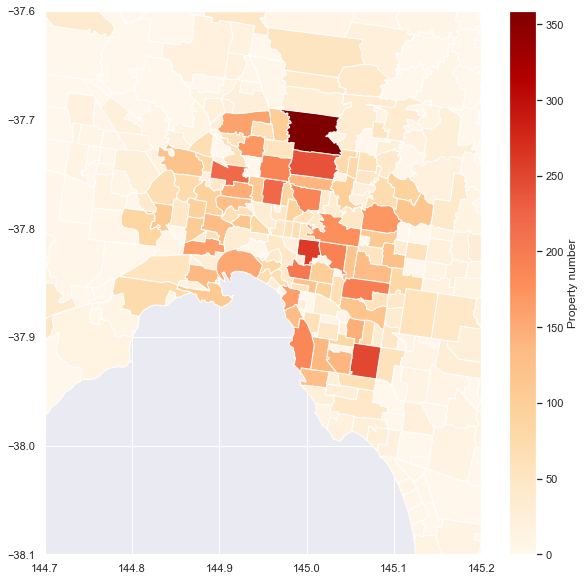

In [53]:

melb_vis_count['Number'].fillna(0,inplace = True)
fig,axs = plt.subplots(1,1)

melb_vis_count.plot(column='Number',ax = axs,legend = True,legend_kwds = {'label':'Property number','orientation':'vertical'},cmap='OrRd')
plt.xlim(144.70, 145.20)
plt.ylim(-38.10, -37.60)

The first plot shows that properties with high median price located in the north of center and by coastal line especially in Cheltenham. But property listing were concentrated in the north of Melbourne.

#### Property Price distribution by Year and Type

In [19]:
df_melb_2016 = df_melb[df_melb['Year'] == '2016'] # 6336 records in 2016
df_melb_2017 = df_melb[df_melb['Year'] == '2017'] # 7244 records in 2017
df_melb_2017.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2,2017,3
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,3,2017,3


In [20]:
df_melb_h = df_melb[df_melb['Type'] == 'h']
df_melb_other = df_melb.drop(df_melb[df_melb['Type'] == 'h'].index)

[Text(0.5, 1.0, 'The distribution of Townhouse and unit price')]

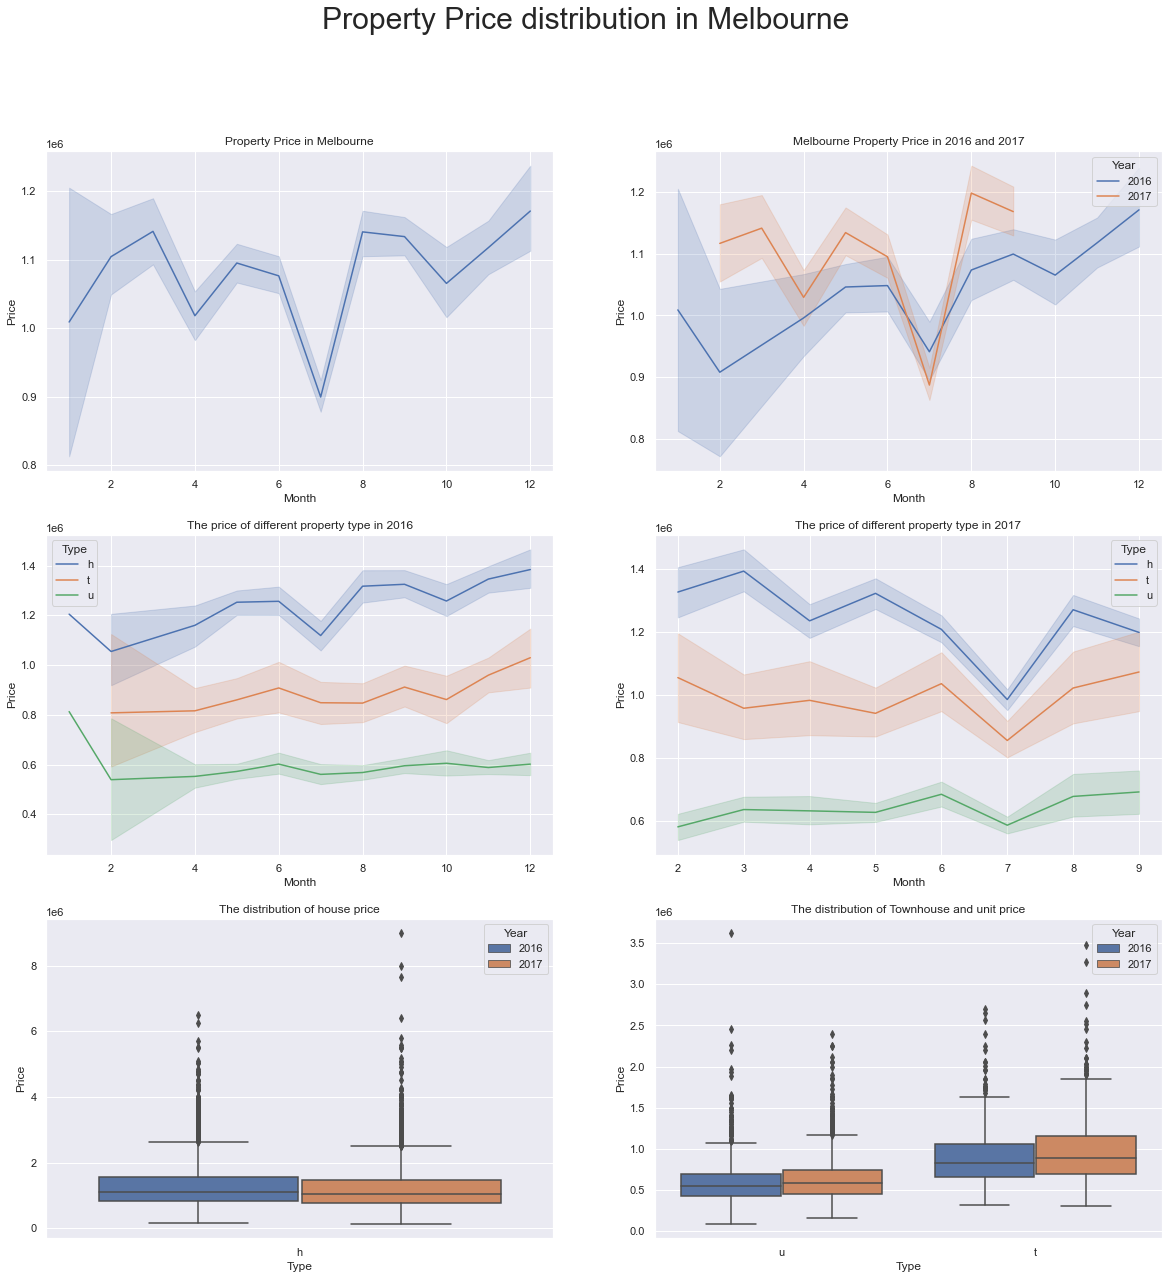

In [22]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(20,20))
order = ['h','t','u']
fig.suptitle('Property Price distribution in Melbourne',fontsize=30)
sns.lineplot(x='Month',y='Price',data = df_melb,ax=axs[0][0]).set(title='Property Price in Melbourne')
sns.lineplot(x='Month',y='Price',hue = 'Year', data = df_melb,ax=axs[0][1]).set(title='Melbourne Property Price in 2016 and 2017')
sns.lineplot(x='Month',y='Price',hue='Type',hue_order = order,data = df_melb_2016,ax=axs[1,0]).set(title = 'The price of different property type in 2016')
sns.lineplot(x='Month',y='Price',hue='Type',hue_order = order,data = df_melb_2017,ax=axs[1,1]).set(title = 'The price of different property type in 2017')
sns.boxplot(x = 'Type',y='Price',hue='Year',data=df_melb_h,ax=axs[2,0]).set(title='The distribution of house price')
sns.boxplot(x= 'Type',y='Price',hue='Year',data=df_melb_other,ax=axs[2,1]).set(title='The distribution of Townhouse and unit price')

According to the first row, the median house price was around $903,000.  Since the data for April to September in both 2016 and 2017 are complete and observation numbers are close. 6336 observations in 2016 and 7244 observations in 2017. Therefore, I also ploted the distribution of property prices from year to year. 

The graph shows the property prices in 2017 were higher than those in 2016 (excluding July). But price had the same pattern that decrease sharply in July of both two years.

In the middle row, the figures show a comparison between 3 type of properties. Obviously, house prices ranked the top and townhouses are next, with Unit far below them.

In addition, house prices dropped significantly in July 2016, but all 3 types of property prices reduced to the botoom in July 2017.



### Particular evidence

In [137]:
relist_address = pd.DataFrame(df_melb['Address'].value_counts())
relist_address .columns = ['Num']

relist_address  = relist_address[relist_adress['Num']>1] # 193
relist_address['Address'] = relist_address.index

relist = df_melb.merge(relist_address,on='Address',how = 'inner')
relist.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month,Num
0,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2,2017,3,3
1,Glen Iris,5 Charles St,4,h,2010000.0,S,Marshall,10/12/2016,9.2,3146.0,4.0,2.0,2.0,659.0,212.0,1930.0,Boroondara,-37.8509,145.0916,Southern Metropolitan,10412.0,2779,2016,12,3
2,Sunshine North,5 Charles St,4,h,705000.0,S,Douglas,25/02/2017,13.3,3020.0,4.0,2.0,1.0,570.0,NaN,NaN,Brimbank,-37.7749,144.8329,Western Metropolitan,4217.0,6046,2017,2,3
3,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,3/12/2016,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,Moonee Valley,-37.7203,144.8755,Western Metropolitan,3464.0,39,2016,12,2
4,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,4/03/2017,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,Moonee Valley,-37.7203,144.8755,Western Metropolitan,3464.0,40,2017,3,2
5,Albert Park,6 Brooke St,2,h,980000.0,S,Greg,28/05/2016,3.3,3206.0,2.0,1.0,0.0,79.0,68.0,1890.0,Port Phillip,-37.8387,144.9519,Southern Metropolitan,3280.0,115,2016,5,2
6,Northcote,6 Brooke St,3,h,1655000.0,SP,Jellis,8/10/2016,5.5,3070.0,3.0,1.0,3.0,472.0,101.0,1924.0,Darebin,-37.7765,145.0027,Northern Metropolitan,11364.0,4407,2016,10,2
7,Altona North,21 Hatherley Gr,3,h,750000.0,SP,Jas,4/03/2017,11.1,3025.0,3.0,1.0,3.0,554.0,NaN,NaN,Hobsons Bay,-37.8449,144.8500,Western Metropolitan,5132.0,188,2017,3,2
8,Altona North,21 Hatherley Gr,3,h,700000.0,VB,Jas,10/12/2016,11.1,3025.0,3.0,1.0,3.0,554.0,NaN,NaN,Hobsons Bay,-37.8449,144.8500,Western Metropolitan,5132.0,197,2016,12,2
9,Ascot Vale,75 Maribyrnong Rd,6,h,2425000.0,PI,Brad,4/06/2016,5.9,3032.0,6.0,3.0,2.0,1014.0,435.0,1887.0,Moonee Valley,-37.7721,144.9184,Western Metropolitan,6567.0,292,2016,6,2


In [138]:
relist_new = relist[['Suburb','Address']]
relist_new['compare'] = relist_new.duplicated()

index = relist_new[relist_new['compare']==True]['Address'].reset_index()
result = relist.merge(index,on='Address',how='inner')
result.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month,Num,index
0,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,3/12/2016,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,Moonee Valley,-37.7203,144.8755,Western Metropolitan,3464.0,39,2016,12,2,4
1,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,4/03/2017,13.5,3042.0,3.0,2.0,1.0,0.0,145.0,1965.0,Moonee Valley,-37.7203,144.8755,Western Metropolitan,3464.0,40,2017,3,2,4
2,Altona North,21 Hatherley Gr,3,h,750000.0,SP,Jas,4/03/2017,11.1,3025.0,3.0,1.0,3.0,554.0,NaN,NaN,Hobsons Bay,-37.8449,144.8500,Western Metropolitan,5132.0,188,2017,3,2,8
3,Altona North,21 Hatherley Gr,3,h,700000.0,VB,Jas,10/12/2016,11.1,3025.0,3.0,1.0,3.0,554.0,NaN,NaN,Hobsons Bay,-37.8449,144.8500,Western Metropolitan,5132.0,197,2016,12,2,8
4,Ascot Vale,75 Maribyrnong Rd,6,h,2425000.0,PI,Brad,4/06/2016,5.9,3032.0,6.0,3.0,2.0,1014.0,435.0,1887.0,Moonee Valley,-37.7721,144.9184,Western Metropolitan,6567.0,292,2016,6,2,10
5,Ascot Vale,75 Maribyrnong Rd,6,h,2250000.0,PI,Jellis,13/05/2017,5.9,3032.0,6.0,3.0,2.0,1012.0,435.0,1887.0,Moonee Valley,-37.7721,144.9184,Western Metropolitan,6567.0,7468,2017,5,2,10
6,Balwyn,112 Belmore Rd,5,h,2570000.0,PI,RT,3/12/2016,9.7,3103.0,5.0,3.0,2.0,715.0,420.0,2009.0,Boroondara,-37.8028,145.0768,Southern Metropolitan,5682.0,510,2016,12,2,16
7,Balwyn,112 Belmore Rd,5,h,3020000.0,PI,Jellis,28/05/2016,9.7,3103.0,5.0,3.0,2.0,715.0,420.0,2009.0,Boroondara,-37.8028,145.0768,Southern Metropolitan,5682.0,575,2016,5,2,16
8,Balwyn North,30 Abbott St,7,h,1350000.0,PI,Barry,3/12/2016,9.2,3104.0,7.0,2.0,0.0,942.0,NaN,NaN,Boroondara,-37.7923,145.1029,Southern Metropolitan,7809.0,589,2016,12,2,20
9,Balwyn North,30 Abbott St,5,h,1550000.0,VB,Fletchers,28/05/2016,9.2,3104.0,7.0,2.0,0.0,942.0,NaN,NaN,Boroondara,-37.7923,145.1029,Southern Metropolitan,7809.0,683,2016,5,2,20


In [139]:
df_melb[df_melb['Address'] == '36 Aberfeldie St']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month
4125,Moonee Ponds,36 Aberfeldie St,3,h,1725000.0,PI,Nelson,24/09/2016,6.9,3039.0,3.0,2.0,3.0,596.0,203.0,1950.0,Moonee Valley,-37.76090,144.90500,Western Metropolitan,6232.0,4125,2016,9
9240,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,3/06/2017,6.2,3039.0,3.0,2.0,2.0,596.0,203.0,1950.0,Moonee Valley,-37.76086,144.90497,Western Metropolitan,6232.0,9240,2017,6
9634,Moonee Ponds,36 Aberfeldie St,3,h,1850000.0,SP,McDonald,17/06/2017,6.2,3039.0,3.0,2.0,2.0,596.0,203.0,1950.0,Moonee Valley,-37.76086,144.90497,Western Metropolitan,6232.0,9634,2017,6


In [140]:
df_melb[df_melb['Address'] == '21 Hatherley Gr']

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Number,Year,Month
188,Altona North,21 Hatherley Gr,3,h,750000.0,SP,Jas,4/03/2017,11.1,3025.0,3.0,1.0,3.0,554.0,NaN,NaN,Hobsons Bay,-37.8449,144.85,Western Metropolitan,5132.0,188,2017,3
197,Altona North,21 Hatherley Gr,3,h,700000.0,VB,Jas,10/12/2016,11.1,3025.0,3.0,1.0,3.0,554.0,NaN,NaN,Hobsons Bay,-37.8449,144.85,Western Metropolitan,5132.0,197,2016,12


The chart at the bottom shows median price increases for townhouses and units in 2017. This is also evidenced by  specific records. Of the 13,580 address data, there are only 13,378 unique values, meaning some properties were relisted on different sales or on different dates. I found some of them. The '36 Aberfeldie St' property has been relisted for the third time, and its sale price did rise in 2017.Also it can be seen in '21 Hatherley Gr'

### Factors affecting property price in Melbourne.

#### Location factor

In [23]:
df_melb_suburb = df_melb.groupby(['Regionname','CouncilArea','Suburb'])['Price'].median().reset_index()
df_suburb_price = df_melb_suburb.sort_values(by='Price',ascending = False)

df_melb_regionname = df_melb.groupby(['Regionname'])['Price'].median().reset_index()
df_region_price = df_melb_regionname.sort_values(by='Price',ascending = False)

df_melb_council = df_melb.groupby(['CouncilArea'])['Price'].median().reset_index()[:8]
df_council_price = df_melb_council.sort_values(by='Price',ascending = False)


[Text(0.5, 1.0, 'In CouncilArea')]

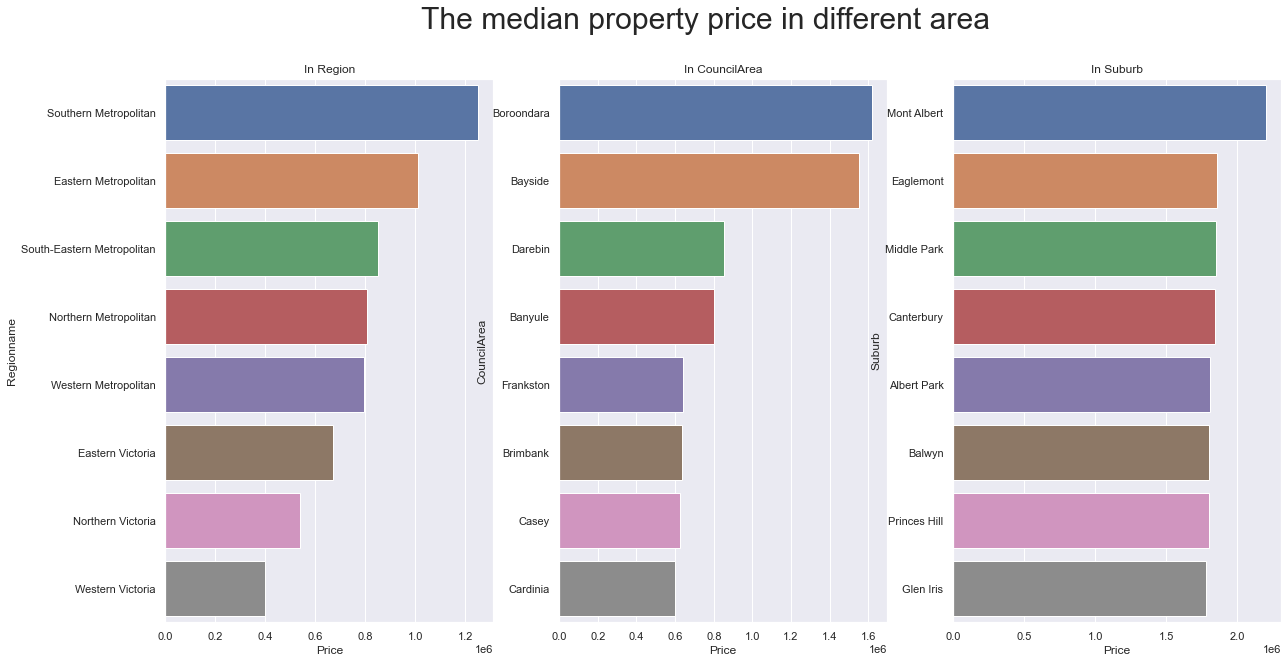

In [24]:
fig,axs = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
fig.suptitle('The median property price in different area',fontsize=30)
sns.barplot(x='Price',y='Suburb',data=df_suburb_price[:8],ax=axs[2]).set(title='In Suburb')
sns.barplot(x='Price',y='Regionname',data=df_region_price,ax=axs[0]).set(title='In Region')
sns.barplot(x='Price',y='CouncilArea',data=df_council_price,ax=axs[1]).set(title='In CouncilArea')

Obviously, property in differnt regions,council areas and Suburbs had different price values.

#### Property Type factor

[Text(0.5, 1.0, 'In 2017')]

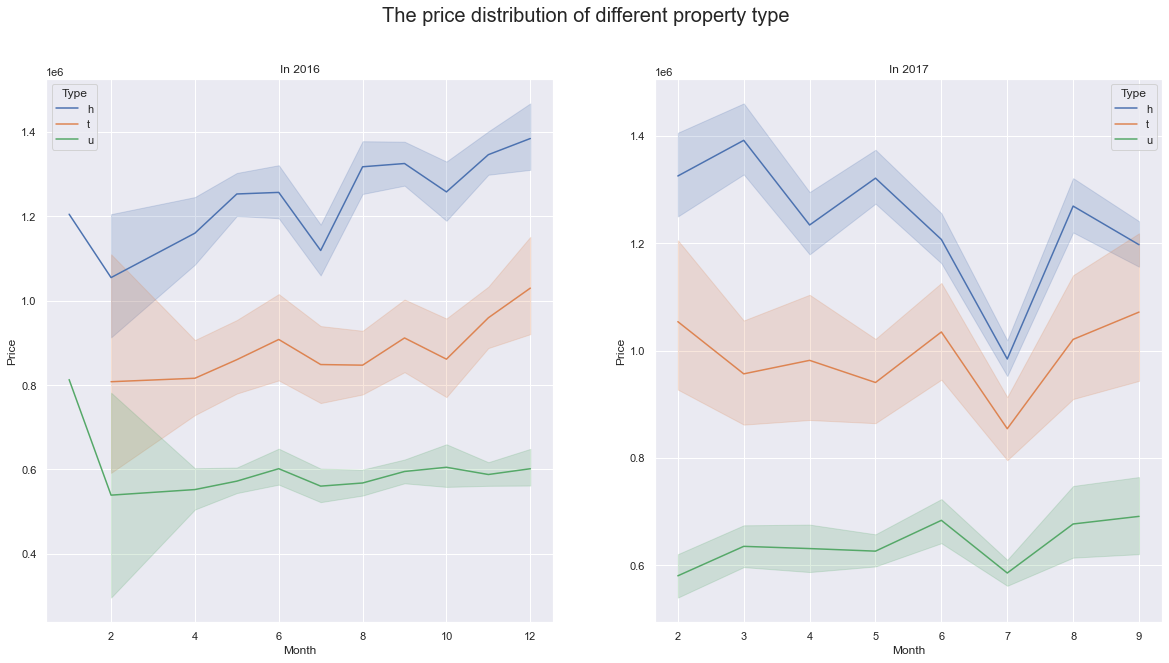

In [25]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
order = ['h','t','u']
plt.suptitle("The price distribution of different property type",fontsize=20)
sns.lineplot(x='Month',y='Price',hue='Type',hue_order = order, data = df_melb_2016,ax=axs[0]).set(title = 'In 2016')
sns.lineplot(x='Month',y='Price',hue='Type',hue_order = order, data = df_melb_2017,ax=axs[1]).set(title = 'In 2017')

Among three property type including house, townhouse and unit, the unit always were the cheapest, and the house were the most expensive.

#### Distance factor

[Text(0.5, 1.0, 'The distribution of Distance')]

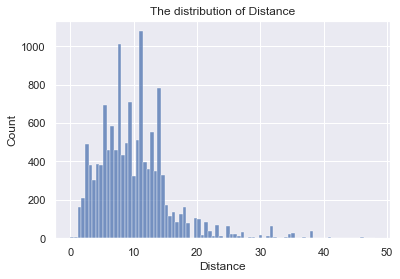

In [26]:
sns.histplot(data=df_melb,x='Distance').set(title='The distribution of Distance')

In [27]:
df_region_price

,Regionname,Price
5,Southern Metropolitan,1250000.0
0,Eastern Metropolitan,1010000.0
4,South-Eastern Metropolitan,850000.0
2,Northern Metropolitan,806250.0
6,Western Metropolitan,793000.0
1,Eastern Victoria,670000.0
3,Northern Victoria,540000.0
7,Western Victoria,400000.0


In [28]:
NM = df_melb.loc[(df_melb['Regionname']=='Northern Metropolitan') & (df_melb['Type']=='u')][['Suburb','Price','Distance']]
NM_s_p = NM.groupby(['Suburb'])['Price'].median().reset_index()
NM_s_d = NM.groupby(['Suburb'])['Distance'].median().reset_index()
NM_Filter = NM_s_p.merge(NM_s_d,on='Suburb')
NM_Filter.head(5)

,Suburb,Price,Distance
0,Abbotsford,502500.0,2.5
1,Alphington,465000.0,6.4
2,Broadmeadows,310000.0,14.0
3,Brunswick,496000.0,5.2
4,Brunswick East,505000.0,4.5


In [29]:
SEM = df_melb.loc[(df_melb['Regionname']=='South-Eastern Metropolitan') & (df_melb['Type']=='u')][['Suburb','Price','Distance']]
SEM_s_p = SEM.groupby(['Suburb'])['Price'].median().reset_index()
SEM_s_d = SEM.groupby(['Suburb'])['Distance'].median().reset_index()
SEM_Filter = SEM_s_p.merge(SEM_s_d,on='Suburb')
SEM_Filter.head(5)

,Suburb,Price,Distance
0,Carrum,590000.0,31.2
1,Chelsea,582000.0,27.0
2,Clayton,780000.0,16.7
3,Clayton South,637500.0,17.5
4,Dandenong,359000.0,24.7


[Text(0.5, 1.0, 'In South-Eastern Metropolitan')]

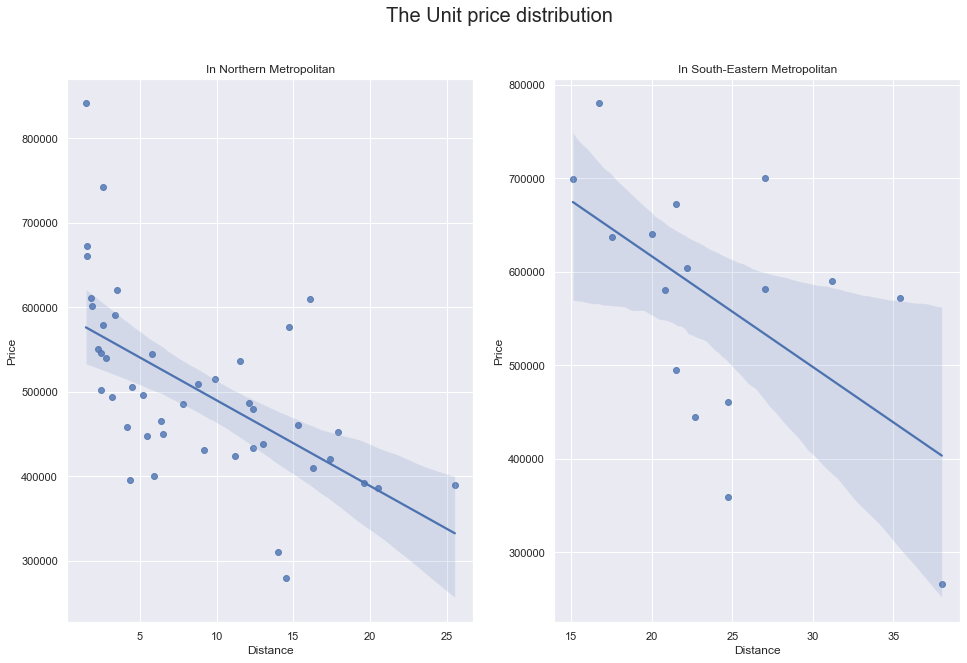

In [30]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,10))
fig.suptitle('The Unit price distribution',fontsize=20)
sns.regplot(NM_Filter['Distance'],NM_Filter['Price'],ax=axs[0]).set(title='In Northern Metropolitan')
sns.regplot(SEM_Filter['Distance'],SEM_Filter['Price'],ax=axs[1]).set(title='In South-Eastern Metropolitan')

Since the median property prices of Northern Metropolitan and Western Metropolitan were very close at $80.4 and $79.3 respectively, I chose Unit distance in these two regions for comparison. The chart above shows that the further the unit was built, the lower the unit price in Northern Metropolitan. We also found this pattern in the western metropolitan.

#### Landsize factor

[Text(0.5, 1.0, 'Landsize distribution')]

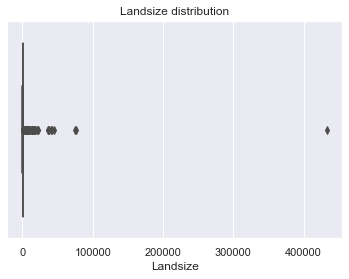

In [31]:
sns.boxplot(df_melb['Landsize']).set(title='Landsize distribution')

In [32]:
Q1 = df_melb['Landsize'].quantile(0.25)
Q3 = df_melb['Landsize'].quantile(0.75)
upperbounder = Q3 + 1.5 * (Q3 - Q1)
df_melb['Landsize'].max() # 433014.0
upperbounder #1362.0

1362.0

In [33]:
df_melb.groupby(['Suburb']).count()['Number'].sort_values(ascending=False)

Suburb
Reservoir             359
Richmond              260
Bentleigh East        249
Preston               239
Brunswick             222
                     ... 
Attwood                 1
Beaconsfield Upper      1
Bacchus Marsh           1
Sandhurst               1
Officer                 1
Name: Number, Length: 314, dtype: int64

In [34]:
df_r = df_melb[(df_melb['Suburb'] == 'Reservoir') & (df_melb['Type'] == 'h') & (df_melb['Landsize']<1362)]
df_richmond = df_melb[(df_melb['Suburb'] == 'Richmond') & (df_melb['Type'] == 'h') & (df_melb['Landsize']<1362)]

<AxesSubplot:xlabel='Landsize', ylabel='Price'>

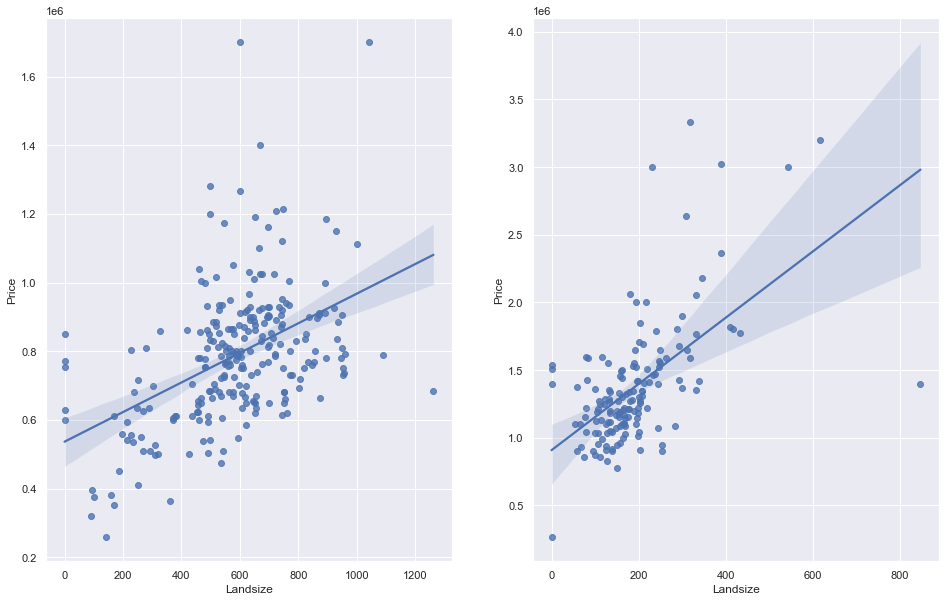

In [35]:
fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(16,10))
sns.regplot(x='Landsize',y='Price',data= df_r,ax=axs[0])
sns.regplot(x='Landsize',y='Price',data= df_richmond,ax=axs[1])

The maximum value of Distance was 433014.0. It is hard to see the distribution of landsize without removing the outliers. So we set the upper bouder of land size to 1362.

Among all suburbs, Reservoir had the highest number (359) of listings,
It was followed by the Richmond with 260 records. So we chose the houses data of them  to analysis.

We found that the more expensive Unit, the more close to the down center.  And this rule applied in Richmond as well.

### Reasons for price falling sharply in July

#### Location factor

In [36]:
df_201607 = df_melb[(df_melb['Year'] == '2016') & (df_melb['Month'] == 7)&(df_melb['Type'] == 'h')]

df_201607_suburb = df_201607.groupby(['Suburb'])['Price'].median().reset_index()

df_201607_suburb_count = df_201607.groupby(['Suburb'])['Number'].count().sort_values(ascending=False)[:6]
df_201607_suburb_count = df_201607_suburb_count.reset_index()

df_201607_suburb_test = df_201607_suburb_count.merge(df_201607_suburb,on='Suburb')
df_201607_suburb_test
df_201607_suburb_test = df_201607_suburb_test.rename(columns = {'Price':'Price in July'})
df_201607_suburb_test

df_201609 = df_melb[(df_melb['Year'] == '2016') & (df_melb['Month'] == 9)&(df_melb['Type'] == 'h')]
df_201609_suburb = df_201609.groupby(['Suburb'])['Price'].median().reset_index()
df_suburb_test = df_201607_suburb_test.merge(df_201609_suburb,on='Suburb')
df_suburb_test = df_suburb_test.rename(columns={'Price':'Price in September'})
df_suburb_test

,Suburb,Number,Price in July,Price in September
0,Sunshine,11,679500.0,633000.0
1,Reservoir,10,796500.0,780000.0
2,Preston,9,830000.0,930000.0
3,Richmond,9,1212500.0,1290000.0
4,Ascot Vale,8,955000.0,1135000.0
5,Bentleigh East,8,1238000.0,1175000.0


In [37]:
df_201707_h = df_melb[(df_melb['Year'] == '2017') & (df_melb['Month'] == 7) & (df_melb['Type'] == 'h')]
df_201707_suburb = df_201707_h.groupby(['Suburb'])['Price'].median().reset_index()

df_201707_suburb_count = df_201707_h.groupby(['Suburb'])['Number'].count().sort_values(ascending=False)[:10]
df_201707_suburb_count = df_201707_suburb_count.reset_index()

df_201707_suburb_test = df_201707_suburb_count.merge(df_201707_suburb,on='Suburb')
df_201707_suburb_test = df_201707_suburb_test.rename(columns = {'Price':'Price in July'})

df_201708_h = df_melb[(df_melb['Year'] == '2017') & (df_melb['Month'] == 8)& (df_melb['Type'] == 'h')]
df_201708_suburb = df_201708_h.groupby(['Suburb'])['Price'].median().reset_index()
df_2017_test = df_201707_suburb_test.merge(df_201708_suburb,on='Suburb')
df_2017_test = df_2017_test.rename(columns={'Price':'Price in August'})
df_2017_test



,Suburb,Number,Price in July,Price in August
0,Reservoir,22,792750.0,863500.0
1,Werribee,22,495000.0,469000.0
2,Mill Park,21,704500.0,470000.0
3,Mount Waverley,18,1617500.0,1750000.0
4,Epping,15,565000.0,561000.0
5,Lalor,14,687500.0,648000.0
6,Northcote,14,1465000.0,1590000.0
7,Yarraville,14,1079500.0,1100000.0
8,Craigieburn,13,590000.0,573750.0
9,Croydon,12,870000.0,992500.0


Text(0, 0.5, 'Median house Price')

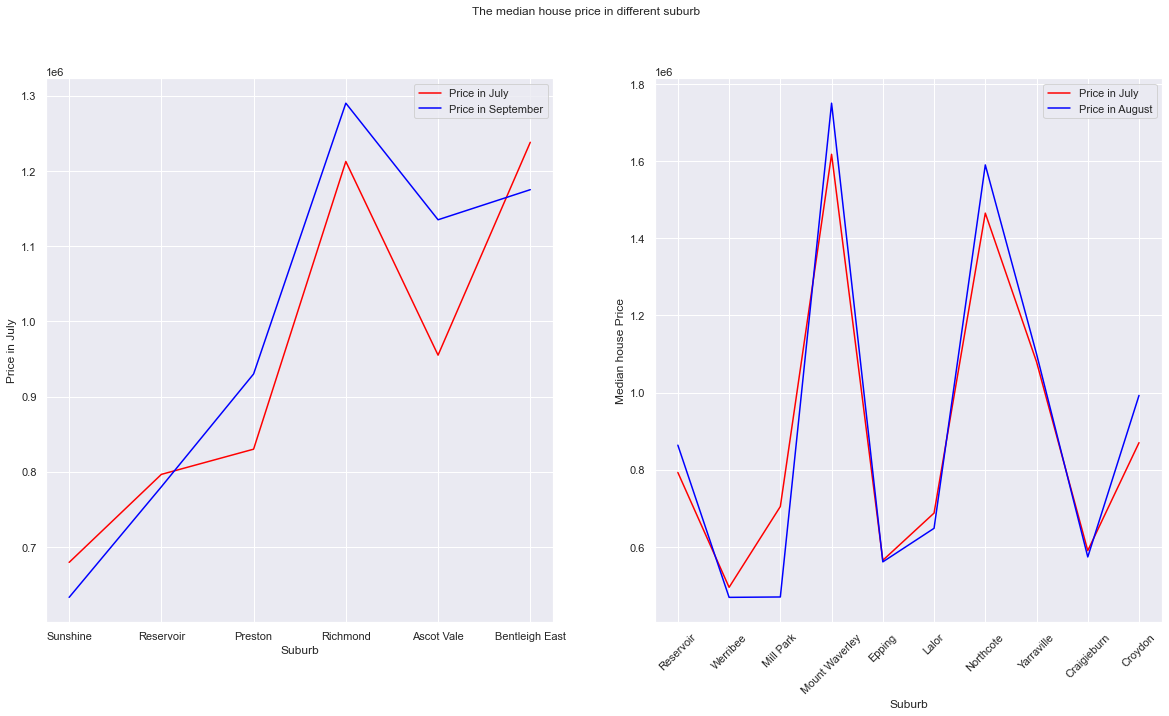

In [38]:
fig,axs = plt.subplots(nrows=1, ncols=2,figsize = (20,10))

fig.suptitle('The median house price in different suburb')
sns.lineplot(x=df_suburb_test['Suburb'], y = df_suburb_test['Price in July'], color = 'Red', label = 'Price in July',ax = axs[0])
sns.lineplot(x=df_suburb_test['Suburb'], y = df_suburb_test['Price in September'], color = 'blue', label = 'Price in September',ax = axs[0])

sns.lineplot(x=df_2017_test['Suburb'], y = df_2017_test['Price in July'], color = 'Red', label = 'Price in July',ax = axs[1])
sns.lineplot(x=df_2017_test['Suburb'], y = df_2017_test['Price in August'], color = 'blue', label = 'Price in August',ax = axs[1])


plt.legend()
plt.xticks(rotation = 45)
plt.ylabel('Median house Price')



Previous analysis has shown that location are factors to house prices. So I drawed two plots to represent the housing prices of different suburbs in July and September 2016, and that in July and August 2017. The house value were lower in July 2016 than that in September 2016 in most suburbs. Also, for the most areas, the house value were higher in August 2017 than that in July 2017.  Therefore, the house price reached the botom in July. 

#### Room type factor

In [39]:
df_melb_count = df_melb.groupby(['Year','Month','Type'])['Number'].count().reset_index()
df_melb_count.head(2)

,Year,Month,Type,Number
0,2016,1,h,1
1,2016,1,u,1


In [40]:
df_201607 = df_melb[(df_melb['Year'] == '2016') & (df_melb['Month'] == 7)] 
df_201607_type_count = df_201607['Type'].value_counts() #get type count in 201607
df_201607_type_total = df_201607['Type'].count()
labels  =['House','Unit','Townhouse'] 
df_201607_type_count

h    286
u    125
t     35
Name: Type, dtype: int64

In [41]:
df_2016_u = df_melb_2016[df_melb_2016['Type'] == 'u']
df_u = df_2016_u.groupby(['Month'])['Number'].count().reset_index() # get unit count in 2016
df_u_total = df_melb_2016.groupby(['Month'])['Number'].count().reset_index() # get property count in 2016
df_u['Ratio'] = df_u['Number'] / df_u_total['Number']
df_u = df_u.drop(index = 0)

Text(0.5, 0.98, 'The Number of property by Month')

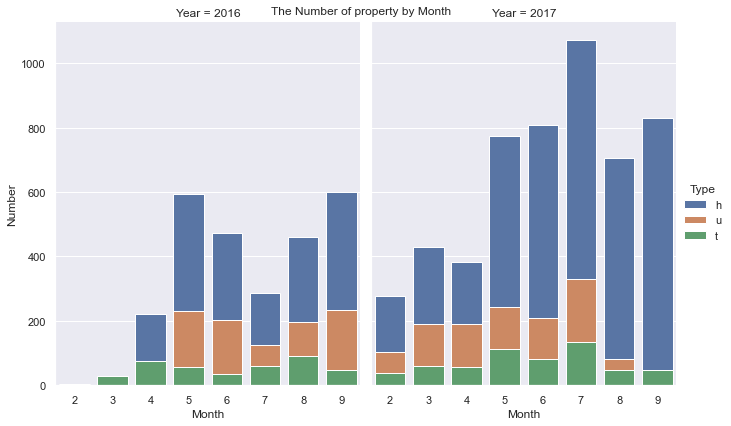

In [42]:
g = sns.FacetGrid(df_melb_count, col="Year", hue="Type",height = 6, aspect = 0.8)
g.map_dataframe(sns.barplot, x="Month", y="Number")
g.add_legend()
g.fig.suptitle('The Number of property by Month')

[Text(0.5, 1.0, 'Unit proportion in 2016 ')]

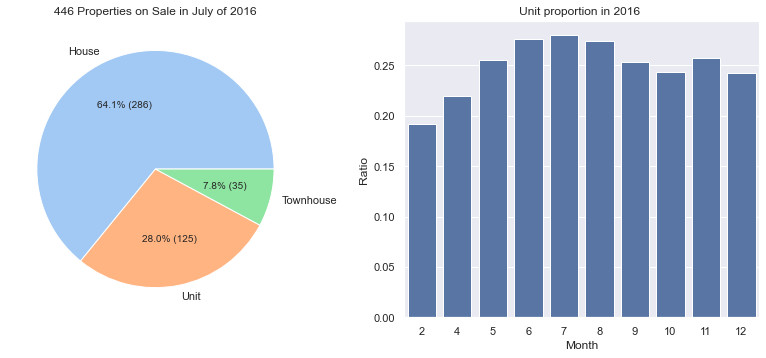

In [43]:
colors = sns.color_palette('pastel')[0:3]
f = plt.figure(figsize = (14,12))
f1 = f.add_subplot(2,2,1)
plt.pie(df_201607_type_count, labels = labels, colors = colors, autopct= make_autopct(df_201607_type_count))
plt.title('%d Properties on Sale in July of 2016' %df_201607_type_total)


f2 = f.add_subplot(2,2,2)
sns.barplot(x='Month',y='Ratio',data = df_u,color='b').set(title = 'Unit proportion in 2016 ')

In previous analysis, I found that room type has a great impact on house prices.
By comparing the number of listed properties each month, we found that the number of property listed in July 2016 was the least, but the proportion of Units in July was the highest among the whole year. Accroding to the previous findings, the value of Unit is much lower than that of house or townhouse. So it might be one of the reasons.

Conclusion:
    
I explored and visuliazed the distribution of real estate price in Mebourne by type, location and year. Property values increased in 2017,compared that in 2016, especially townhouses and Units. But the cost of buying a unit alway lower than townhouse and house. Therefore, investing in a Unit might be a good choice.  

After deeply looking into the relationship between location, property time and distance and land size, I found that any of these have the potential to affect property prices. Some patterns do exist. For instance, an expensive house may have a larger land area in the same suburb. And if an Unit located further, its price were cheaper in the same reigon.

Another finding was the property prices went down to the botom in July. The reason is that there were the lowest house number ratio in July 2016 and the lowerst as well. 

After collecting further data, I will analyze and rank the Correlation coefficient of property price and their factors and determine whether the property values will decline over the same period in the next 3 years. Then I can give investors better investment strategies.